In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import copy
import networkx as nx


Необходимо завести 2 матрицы:
1. Связь переходов и позиций (входы в переходы)
2. Связь переходов и позиций (выходы из переходов)

Также следует завести вектор для всех вершин. В координатах будет занесено количество фишек в позиции

In [60]:
#матрицы связей 
#выход из перехода
M_out = [[1, 0, 0, 0, 0, 0],
         [0, 1, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 1, 1, 0]    
]

#вход в переход
M_in = [ [0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0],
         [0, 1, 0, 1, 0, 0],
         [0, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 1]
]

#начальный вектор позиций
positions = [0, 0, 0, 0, 1, 1]

In [66]:
#матрицы связей 
#выход из перехода
M_out = [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

#вход в переход
M_in = [ [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
]

#начальный вектор позиций
positions = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0]

In [67]:
#функция проверки срабатывания перехода. Возвращает true или false
def transition_availability(pos, trans_num):
    for i in range (len(pos)):
        if M_in[trans_num][i]>pos[i]:
            return(False)
    return(True)

#функция, которая возвращает, какие переходы могут сработать
def transitions_list(pos):
    trans_list = []
    for i in range (len(M_in)):
        if transition_availability(pos, i):
            trans_list.append(i)
    return(trans_list)

#функция, которая возвращает новые позиции фишек
def new_positions(pos, trans_num):
    new_pos = pos.copy()
    for i in range (len(new_pos)):
        new_pos[i] =  new_pos[i] - M_in[trans_num][i] + M_out[trans_num][i]
    return new_pos

In [68]:
#массив, в котором хранятся уже обработанные ранее позиции фишек
processed_situations = [] 
#массив для запоминания возможных переходов
future_positions = []
future_positions.append(positions)
#создаем массив с текущими позициями фишек
temp_positions = []
#массив, где в каждой строке хранятся "координаты" связанных вершин и номер перехода
vertex_link = []
#пока не закончились все пути
while len(future_positions)>0: 
    trans_flag = True 
    temp_positions = future_positions[0].copy()
    #пока есть переходы из текущей позиции или текущая позиция не обрабатывалась ранее
    while (trans_flag) and (temp_positions not in processed_situations):
        processed_situations.append(temp_positions)
        trans_list = transitions_list(temp_positions)
        #если есть ровно один переход
        if len(trans_list)==1:
            trans_num = trans_list[0]
            #ищем новое расположение фишек
            new_pos = new_positions(temp_positions, trans_num)
            #добавляем переход из позиции 1 в позицию 2 в список + номер перехода
            links_num = len(vertex_link)
            vertex_link.append([])
            vertex_link[links_num].append(temp_positions)
            vertex_link[links_num].append(new_pos)
            vertex_link[links_num].append(trans_num+1)
            #перезаписываем позицию
            temp_positions = new_pos.copy()
        #если есть несколько переходов
        elif len(trans_list)>1:
            #будущие позиции необходимо занести 
            for i in range (1, len(trans_list)):
                trans_num = trans_list[i]
                new_pos = new_positions(temp_positions, trans_num)
                future_positions.append(new_pos)
                #тоже занести переход
                links_num = len(vertex_link)
                vertex_link.append([])
                vertex_link[links_num].append(temp_positions)
                vertex_link[links_num].append(new_pos)
                vertex_link[links_num].append(trans_num+1)
            #обработка аналогична тому, когда всего 1 путь
            trans_num = trans_list[0]
            new_pos = new_positions(temp_positions, trans_num)
            links_num = len(vertex_link)
            vertex_link.append([])
            vertex_link[links_num].append(temp_positions)
            vertex_link[links_num].append(new_pos)
            vertex_link[links_num].append(trans_num+1)
            temp_positions = new_pos.copy()
            
        else:
            trans_flag = False
    #после выхода из цикла удаляем элемент с 0 позиции из future_positions 
    future_positions.pop(0)
    
#последняя вершина может не попасть в список, ее надо добавить
if temp_positions not in processed_situations:
    processed_situations.append(temp_positions)
    
print(vertex_link)
print(processed_situations)

[[[0, 1, 0, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 1], 5], [[0, 1, 0, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 0, 0], 2], [[0, 0, 0, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 1, 0, 1], 5], [[0, 0, 0, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 4], [[0, 0, 0, 1, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 5], [[0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6], [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0], 1], [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 1, 0, 0, 0], 3], [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 1, 0, 0], 2], [[0, 0, 1, 1, 1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 0, 0], 3], [[0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0, 1, 0, 1], 2], [[0, 0, 0, 0, 1, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 4]]
[[0, 1, 0, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 

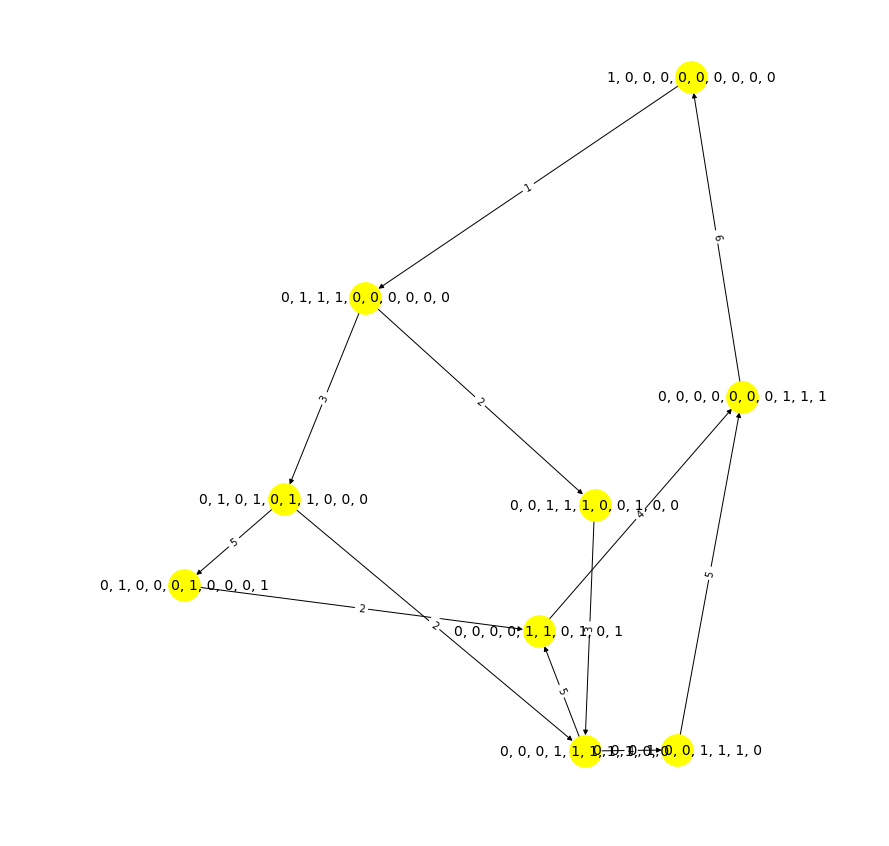

In [125]:
graph = nx.DiGraph()
for i in range (len(vertex_link)):
    graph.add_edges_from([(', '.join(map(str, vertex_link[i][0])),', '.join(map(str, vertex_link[i][1])) )], weight = vertex_link[i][2])

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in graph.edges(data=True)])  
pos = nx.spring_layout(graph)
nx.draw_networkx_edge_labels(graph,pos, edge_labels=edge_labels)
nx.draw(graph, pos, edge_cmap=plt.cm.Reds,
         node_color='yellow',
         node_size=1000,
         font_size=14,
         with_labels=True)
plt.rcParams["figure.figsize"] = (15,15)


x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()



In [10]:
3

1, 2, 3, 4
